<a href="https://colab.research.google.com/github/JislordCodes/FashionPredictionModel/blob/main/neural_net_model_diabtetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
# Required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import SMOTE


In [22]:
# Load your data (replace with your actual dataset)
data = pd.read_csv("diabetes.csv")

# Preprocessing Steps

# Handling missing data (example using mean imputation)
data.fillna(data.mean(), inplace=True)

In [23]:
# Separating features and labels
X = data.drop('Outcome', axis=1)
y = data['Outcome']

In [24]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:

# Splitting data with stratification
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Balancing the training data using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [26]:
# Neural Network Model
def build_nn_model(input_shape):
    model = Sequential()
    model.add(Dense(64, input_dim=input_shape, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Build and compile the model
input_shape = X_train_balanced.shape[1]
model = build_nn_model(input_shape)

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Training the model
history = model.fit(X_train_balanced, y_train_balanced,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    batch_size=64,
                    callbacks=[early_stopping],
                    verbose=1)



Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 249ms/step - accuracy: 0.5113 - loss: 0.7409 - val_accuracy: 0.5130 - val_loss: 0.6912
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5679 - loss: 0.6840 - val_accuracy: 0.4957 - val_loss: 0.6948
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6439 - loss: 0.6512 - val_accuracy: 0.6000 - val_loss: 0.6773
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6237 - loss: 0.6440 - val_accuracy: 0.6348 - val_loss: 0.6551
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6963 - loss: 0.6320 - val_accuracy: 0.6696 - val_loss: 0.6353
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7266 - loss: 0.5994 - val_accuracy: 0.7043 - val_loss: 0.6155
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7125 - loss: 0.5983 - val_accuracy: 0.7217 - val_loss: 0.5928
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7422 - loss: 0.5705 - val_accuracy: 0.7217 - val_loss:

In [27]:
# Model Evaluation on Validation Set
y_val_pred = (model.predict(X_val) > 0.5).astype(int)
print("\nValidation Set Evaluation:")
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step

Validation Set Evaluation:
Accuracy: 0.7391304347826086
F1 Score: 0.6938775510204082
Confusion Matrix:
 [[51 24]
 [ 6 34]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.68      0.77        75
           1       0.59      0.85      0.69        40

    accuracy                           0.74       115
   macro avg       0.74      0.77      0.73       115
weighted avg       0.79      0.74      0.75       115



In [28]:
# Model Evaluation on Test Set
y_test_pred = (model.predict(X_test) > 0.5).astype(int)
print("\nTest Set Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("F1 Score:", f1_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Test Set Evaluation:
Accuracy: 0.8017241379310345
F1 Score: 0.7228915662650602
Confusion Matrix:
 [[63 12]
 [11 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85        75
           1       0.71      0.73      0.72        41

    accuracy                           0.80       116
   macro avg       0.78      0.79      0.78       116
weighted avg       0.80      0.80      0.80       116



4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step  
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
4/4 ━━━━━━━

<ipython-input-33-475bff648736>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


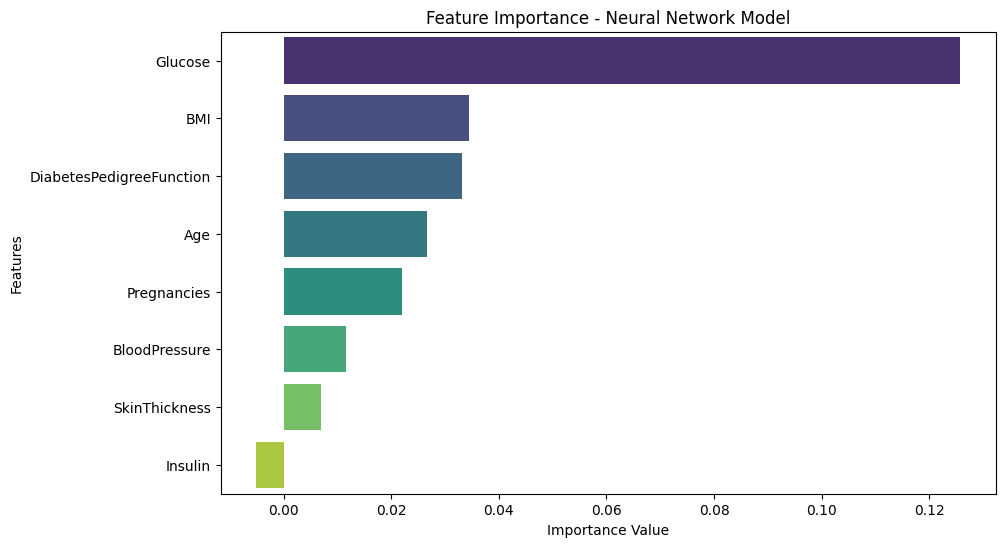

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score

# Define a scoring function compatible with permutation_importance
def keras_score(model, X, y):
    y_pred = (model.predict(X) > 0.5).astype(int)  # Binary classification threshold
    return accuracy_score(y, y_pred)

# Calculate permutation importance
results = permutation_importance(
    model,
    X_val,
    y_val,
    n_repeats=30,
    random_state=42,
    scoring=keras_score  # Use the custom scoring function
)

# Create a DataFrame for visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': results.importances_mean
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance - Neural Network Model')
plt.xlabel('Importance Value')
plt.ylabel('Features')
plt.show()

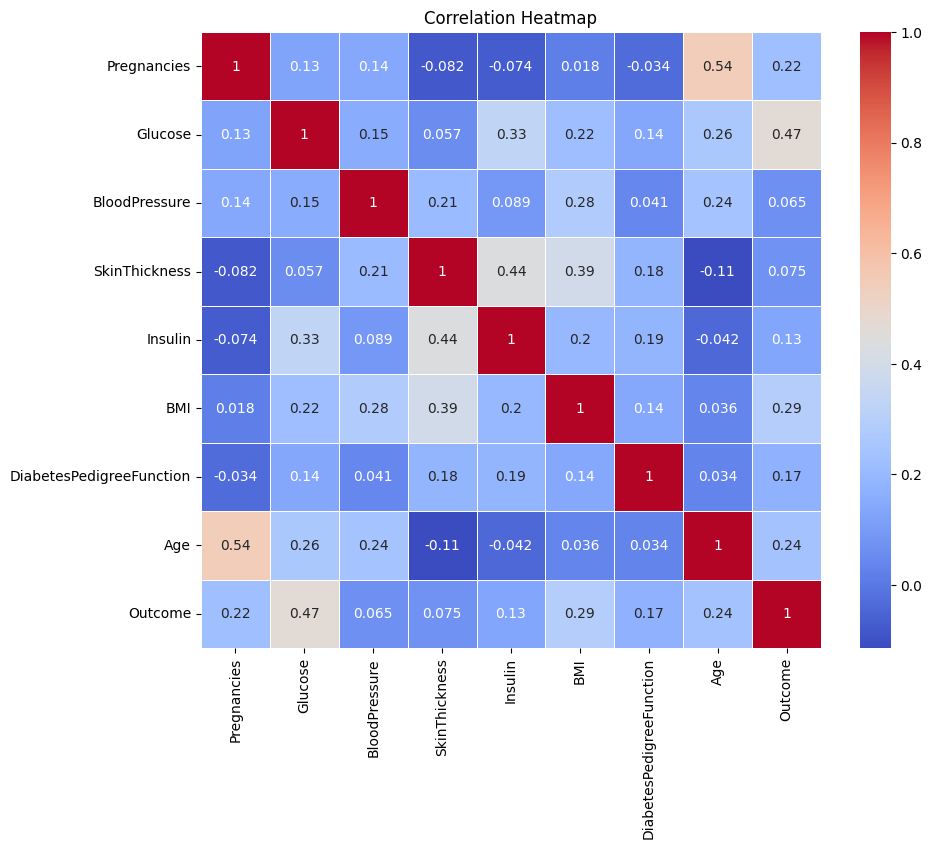

In [34]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()